<a href="https://colab.research.google.com/github/Marjan199/PortfolioProjects/blob/main/Explore_Palmer_penguin_dataset_And_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Understanding the data

In [19]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex


In [20]:
print(penguins.shape)

(344, 7)


In [21]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [44]:
# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
for col in penguins.select_dtypes(include='object').columns:
    print(penguins[col].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
Male      168
Female    165
Name: sex, dtype: int64


In [5]:
print(penguins.loc[336])

species              Gentoo
island               Biscoe
bill_length_mm         44.5
bill_depth_mm          15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     NaN
Name: 336, dtype: object


## Covariance & Correlation

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.
Source: https://tinyurl.com/yd2pezss

In [23]:
print('Covariance:')
penguins.cov()

Covariance:


<ipython-input-23-d4e244c66799>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins.cov()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


from matplotlib import pyplot as plt
_df_11['bill_length_mm'].plot(kind='hist', bins=20, title='bill_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['flipper_length_mm'].plot(kind='hist', bins=20, title='flipper_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['body_mass_g'].plot(kind='hist', bins=20, title='body_mass_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['bill_length_mm'].plot(kind='line', figsize=(8, 4), title='bill_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['bill_depth_mm'].plot(kind='line', figsize=(8, 4), title='bill_depth_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['flipper_length_mm'].plot(kind='line', figsize=(8, 4), title='flipper_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['body_mass_g'].plot(kind='line', figsize=(8, 4), title='body_mass_g')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
print('Correlation:')
penguins.corr()

Correlation:


<ipython-input-25-3ea60aa50865>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


from matplotlib import pyplot as plt
_df_22['bill_length_mm'].plot(kind='hist', bins=20, title='bill_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['flipper_length_mm'].plot(kind='hist', bins=20, title='flipper_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['body_mass_g'].plot(kind='hist', bins=20, title='body_mass_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['bill_length_mm'].plot(kind='line', figsize=(8, 4), title='bill_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['bill_depth_mm'].plot(kind='line', figsize=(8, 4), title='bill_depth_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['flipper_length_mm'].plot(kind='line', figsize=(8, 4), title='flipper_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['body_mass_g'].plot(kind='line', figsize=(8, 4), title='body_mass_g')
plt.gca().spines[['top', 'right']].set_visible(False)

## Missing values

###Checking all the Null Values

In [6]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing= missing_values_table(penguins)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


###Find out each row with null values

In [7]:
penguins[penguins.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


###Treating Null Values

In [10]:
df = penguins.copy()
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
impute = KNNImputer()
for i in df.select_dtypes(include='object').columns:
    df[i][df[i].notnull()] = encode.fit_transform(df[i])

<ipython-input-10-6cada38446c4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-6cada38446c4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-6cada38446c4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
df_sca = pd.DataFrame(sca.fit_transform(df),columns=df.columns)
df_sca.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333,0.0


In [18]:
new_df = pd.DataFrame(impute.fit_transform(df_sca), columns=df.columns)
dt = pd.DataFrame(sca.inverse_transform(new_df),columns=df.columns)
dt['sex'] = dt['sex'].round()
dt['sex'] = dt['sex'].map({0:'Female', 1:'Male'})
dt['species'] = dt['species'].map({0:'Adeile',1:'Chinstrap',2:'Gentoo'})
dt['island'] = dt['island'].map({0:'Biscoe',1:'Dream',2:'Torgersen'})
dt.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Analysing the data visually

## Number of Species

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



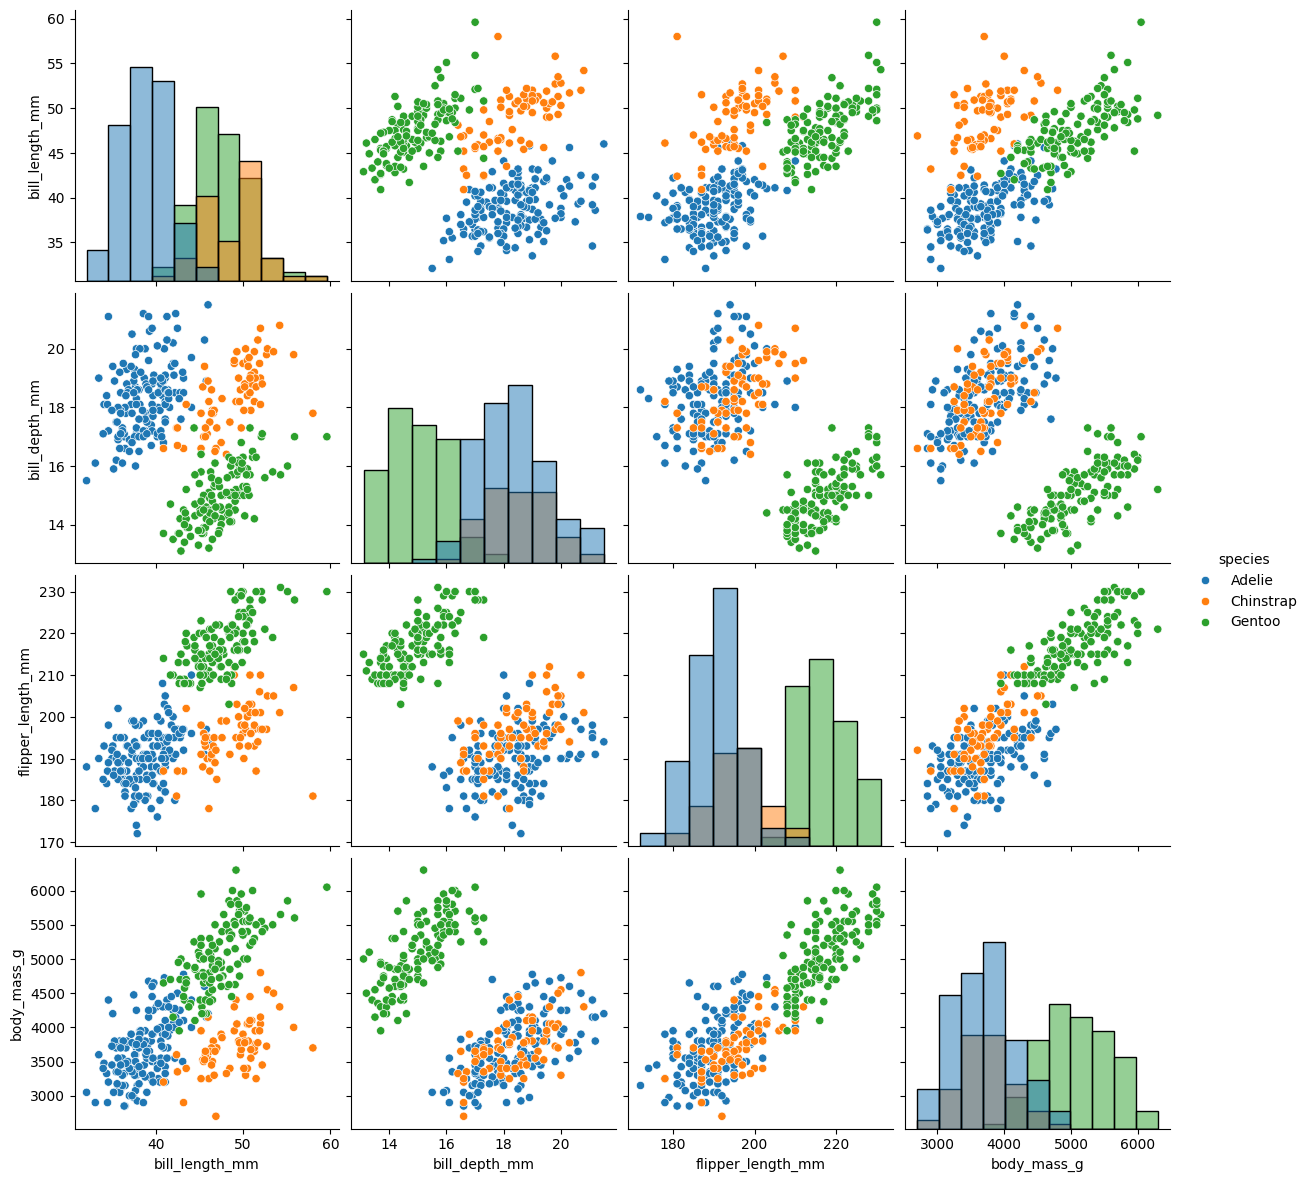

In [34]:
sns.pairplot(penguins, hue="species", size=3,diag_kind="hist")

**Species Based Island Count Plot**

In [24]:
px.bar( data_frame=dt, y = 'island',
        facet_row='species',facet_row_spacing=0.13,
        pattern_shape='species',
        color='species',
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=1000,height=700 )

**Species Based Gender Count Plot**

In [26]:
fig =px.bar( data_frame=dt, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},

width=1000,height=500 )

fig.show()

**Flipper Length and Body Mass Scatter Plot**

In [28]:
fig = px.scatter(data_frame=dt,
           x = 'flipper_length_mm', y = 'body_mass_g',
           color = 'species',
           color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
           symbol='species',
           symbol_map = {'Adeile':'circle', 'Chinstrap':'triangle-up', 'Gentoo':'square'},
           height= 560
           )
fig.update_traces(marker=dict(size=9))
fig.update_layout(title='flipper length (mm) vs body mass (g)',
                  titlefont = dict( color='black', family='Open Sans',),)

fig.show()

**Species Based Gender Scatter Plot**

In [39]:
fig = px.scatter(data_frame=dt, x='flipper_length_mm' , y = 'body_mass_g',
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=500,
                   font=dict(size=17,color='black'))
fig.show()


#*Exploring* Distributions

In [40]:
from plotly.subplots import make_subplots
trace_bm = []
color =['darkorange','mediumorchid','teal']
for var,col in zip(dt.species.unique(),color):
    trace = go.Violin(x = dt['species'][dt['species']==var], y =dt['body_mass_g'][dt['species']==var],
                    box_visible=True,
                    meanline_visible=True,
                    points='all',
                    line_color=col,
                    name=var)
    trace_bm.append(trace)
trace_flipper = []
for var,col in zip(dt.species.unique(),color):
    trace2 = go.Violin(x = dt['species'][dt['species']==var], y =dt['flipper_length_mm'][dt['species']==var],
             box_visible=True,
             meanline_visible=True,
             points='all',
             line_color=col,
        )
    trace_flipper.append(trace2)
fig = make_subplots(rows=2, cols=1, subplot_titles=("Body Mass (g)","Flipper Length (mm)"))
for i in trace_bm:
    fig.add_trace(i,row=1,col=1)
for j in trace_flipper:
    fig.add_trace(j,row=2,col=1)
fig.update_layout(showlegend = False, title = 'Violin Plots',height=800)
fig.show()

# Simple linear regression

## Data cleaning

In [6]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

Typically, you use reset_index() after you've finished manipulating the dataset. By setting inplace=True, you will not create a new DataFrame object. By setting drop=True, you will not insert a new index column into the DataFrame object.

## Exploratory data analysis

To visualize more than one relationship at the same time, we use the pairplot() function from the seaborn package to create a scatterplot matrix.

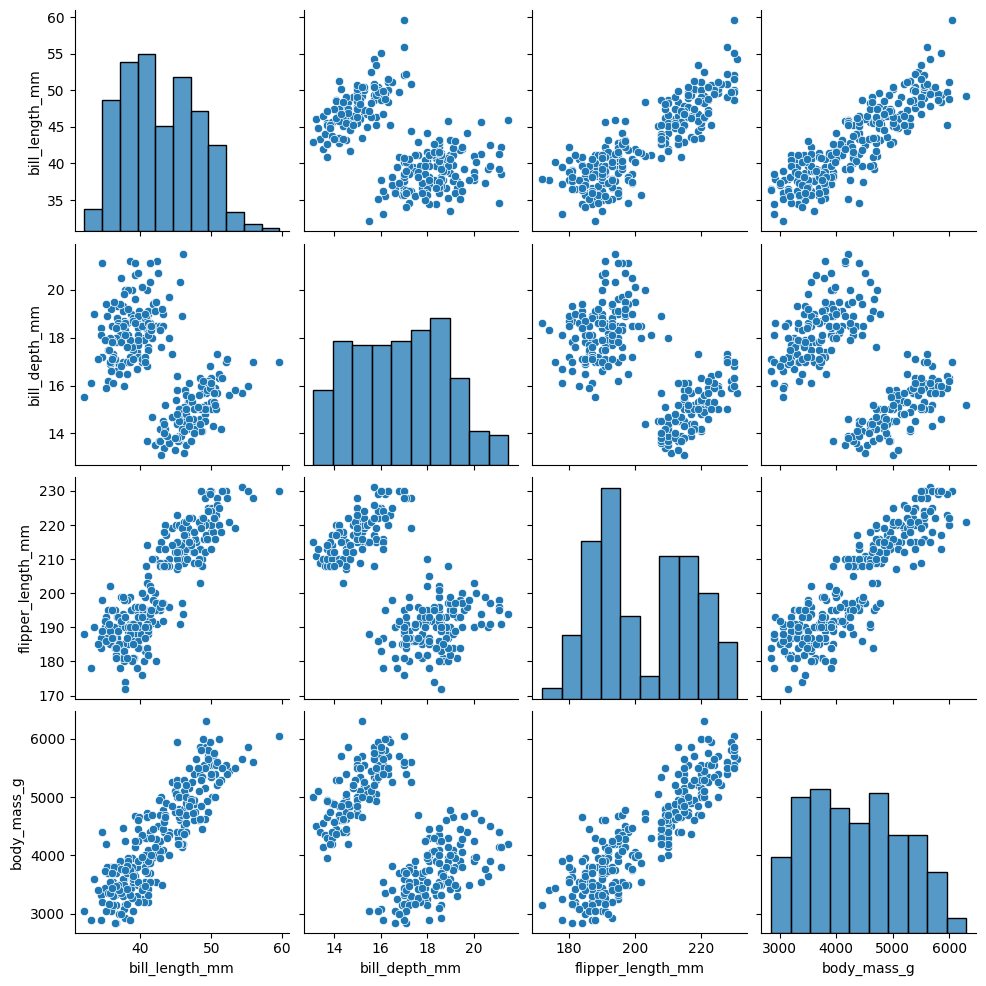

In [7]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:
* bill length (mm) and flipper length (mm)
* bill length (mm) and body mass (g)
* flipper length (mm) and body mass (g)

## Model construction

We will focus on the relationship between bill length (mm) and body mass (g)

We will first subset the variables of interest from the dataframe. You can do this by using double square brackets [[]], and listing the names of the columns of interest.

In [8]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [9]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

In [10]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the ols_formula and ols_data as arguments in the ols() function. After you save the results as a variable, you can call on the fit() function to actually fit the model to the data.

In [11]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.33e-85
Time:                        15:49:47   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

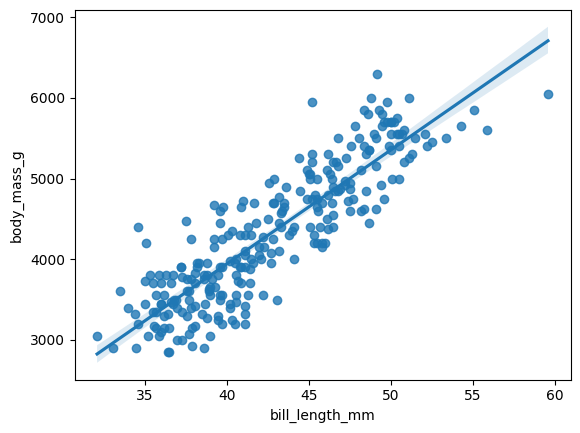

In [13]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## Finish checking model assumptions

There are four main model assumptions for simple linear regression, in no particular order:
1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

We already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, We can only check these assumptions after We have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, We can first subset the X variable by isolating just the `bill_length_mm` column. Additionally, We can save the predicted values from the model using the `model.predict(X)` function.

In [14]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

Then, we can save the model residuals as a variable by using the model.resid attribute.

In [15]:
# Calculate residuals
residuals = model.resid

### Check the normality assumption

To check the normality assumption, we can create a histogram of the residuals using the histplot() function from the seaborn package.

From the below histogram, we may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

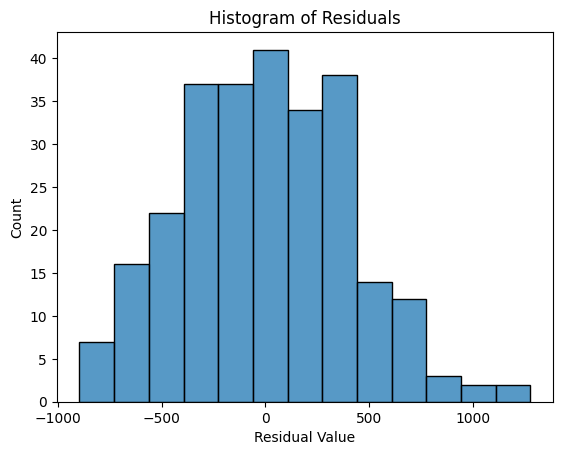

In [16]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, we would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. we can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

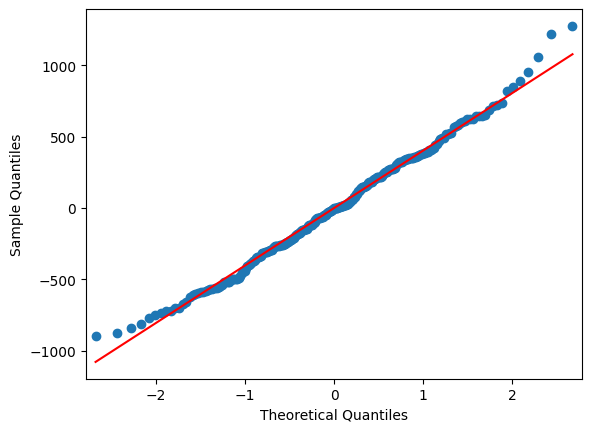

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Check the homoscedasticity assumption

Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, we can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

we can create one scatterplot by using the scatterplot() function from the seaborn package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

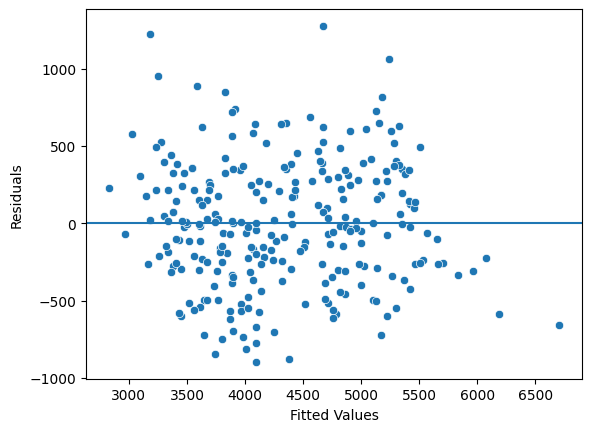

In [18]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()